In [1]:
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 
from PIL import Image
from matplotlib import pyplot as plt
import cv2
import sys

Using TensorFlow backend.
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DELL\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [2]:
model = load_model('C:/Users/DELL/classroom_mobilNet.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [3]:
class_labels = ['auditorium','classroom','concert_hall','meeting_room']


In [5]:
#face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
gender_net = cv2.dnn.readNetFromCaffe('D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/gad/gender_deploy.prototxt', 'D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/gad/gender_net.caffemodel')
gender_list = ['MALE', 'FEMALE']

In [15]:
#For face detection -------------------------

def check2(img):


# Load the cascade
    count=0
    face_cascade = cv2.CascadeClassifier('D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6//haarcascade_frontalface_default.xml')
   
# Read the input image
   # img = cv2.imread(img)
    img = cv2.flip(img,1)
   # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


#Detect faces
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor = 1.2,
        minNeighbors = 5,
        minSize= (30,30),
        flags = cv2.CASCADE_SCALE_IMAGE
    )

#For each face...

    for (x, y, w, h) in faces:
    
#Draw rectangle
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        count=count+1

#Crop face
        face = img[y:y+h, x:x+w].copy()
        blob = cv2.dnn.blobFromImage(face, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

    #Gender
        gender_net.setInput(blob)
        gender_pred = gender_net.forward()
        gender = gender_list[gender_pred[0].argmax()]
        cv2.putText(img,gender,(x,y-40), cv2.FONT_HERSHEY_SIMPLEX, 0.55,(255, 0, 0), 2, cv2.LINE_AA)
    

# Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        count=count+1

# Display the output
   # cv2.imshow('img', x)
    print("No of person detected:",count)
   # plt.imshow(img)
   # plt.show()
  #  cv2.waitKey()

    cv2.imshow('FACES', img)
#	cv2.waitKey(1)
    plt.imshow(img)
    plt.show()

In [16]:
 def check(path):
    # prediction
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x.astype('float32')/255
    pred = np.argmax(model.predict(x))
   
    print("It's a {}.".format(class_labels[pred])) 
   # im=Image.open(path)
    #from IPython.display import Image
    #Image(filename=path) 
    #im.show()
    img = cv2.imread(path)
    check2(img)
 #   plt.imshow(img)
 #   plt.show()
    #plot_file(path)
    #if(class_labels[pred])=='classroom':
    #    check2(img)
    #    break
        
    #print("Empty")    
    #plt.imshow(img)
    #plt.show()
        


It's a classroom.
No of person detected: 0


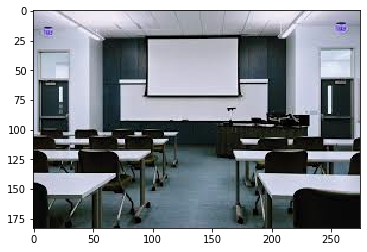

In [8]:
check('D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/scene_dataset/classroom/classroom.jpg')

It's a auditorium.
No of person detected: 0


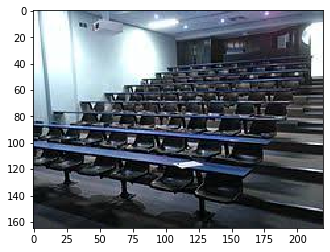

In [10]:
check('D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/scene_dataset/classroom/classroom016 (2).jpg')

It's a auditorium.
No of person detected: 0


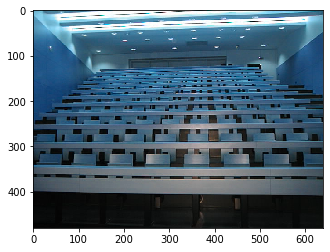

In [17]:
check('D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/MIT_dataset/auditorium/amphi05_1__78.jpg')


It's a classroom.
No of person detected: 10


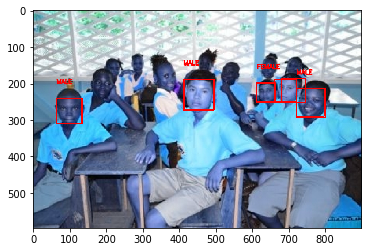

In [17]:
check('D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/classroom_stud.jpg')

In [30]:
check('D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/face1.jpg'

In [1]:
check('D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/gad/class2.jpg')

NameError: name 'check' is not defined

It's a meeting_room.
No of person detected: 5


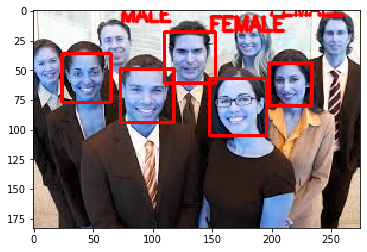

In [23]:
check('D:/@#MYSTUDYENGI/#VIT_STUFFS/Ty/TY_Sem6/edi_Sem6/gad/meet.jpg')

In [ ]:
#large sized of image should be used to check faces and gender classification 